<a href="https://colab.research.google.com/github/Partha103/python_codes/blob/main/HillAndValleyPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [38]:
# Load the dataset
hill_valley_data = pd.read_csv('Hill_Valley_with_noise_Training.data')


In [39]:
# Display the first few rows of the dataset
print(hill_valley_data.head())

# Get a summary of the dataset
print(hill_valley_data.info())

# Describe the dataset statistically
print(hill_valley_data.describe())


         X1        X2        X3        X4        X5        X6        X7  \
0     39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1      1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2  68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3  44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4      5.70      5.40      5.28      5.38      5.27      5.61      6.00   

         X8        X9       X10  ...       X92       X93       X94       X95  \
0     39.53     38.81     38.79  ...     36.62     36.92     38.80     38.52   
1      1.70      1.75      1.78  ...      1.80      1.79      1.77      1.74   
2  73268.61  74465.84  72503.37  ...  73438.88  71053.35  71112.62  74916.48   
3  37668.32  40980.89  38466.15  ...  42625.67  40684.20  46960.73  44546.80   
4      5.38      5.34      5.87  ...      5.17      5.67      5.60      5.94   

        X96       X97       X98       X99      X100  class  
0     3

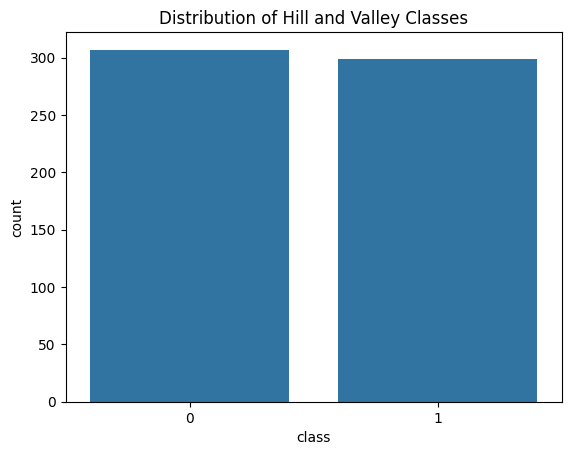

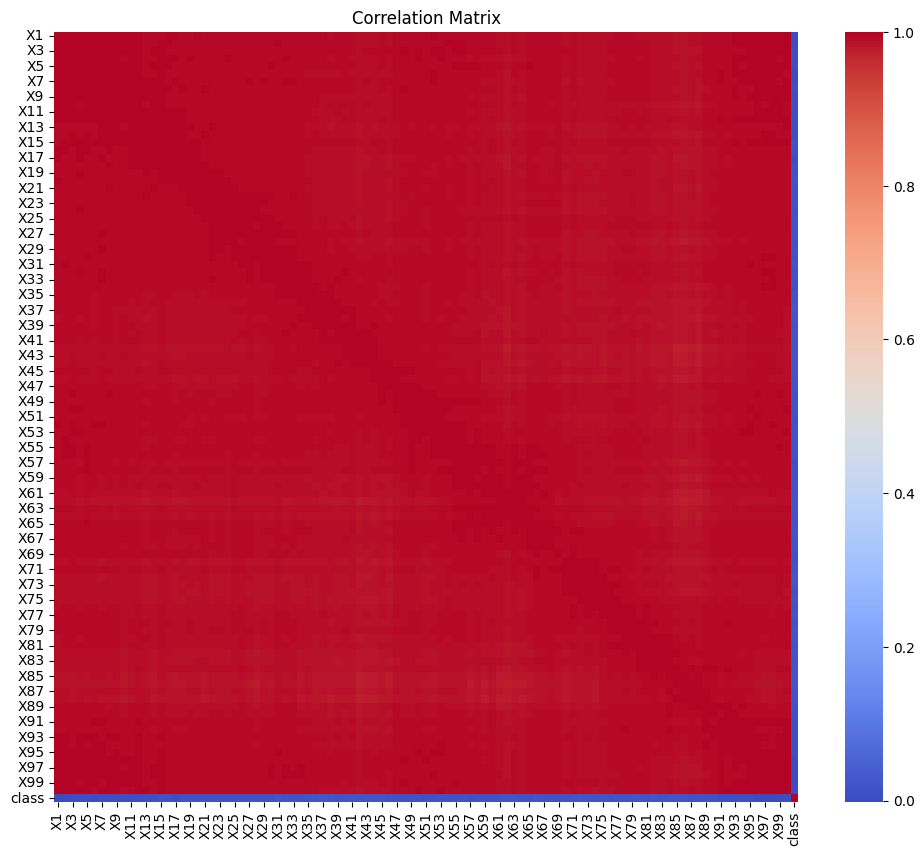

In [40]:
# Visualize the distribution of the target variable
sns.countplot(x='class', data=hill_valley_data)
plt.title('Distribution of Hill and Valley Classes')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = hill_valley_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [41]:
# Check for missing values
print(hill_valley_data.isnull().sum())

# Split the data into features and target variable
X = hill_valley_data.drop(columns=['class'])
y = hill_valley_data['class']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X1       0
X2       0
X3       0
X4       0
X5       0
        ..
X97      0
X98      0
X99      0
X100     0
class    0
Length: 101, dtype: int64


In [42]:
# Feature variables
X = X_scaled

# Target variable
y = hill_valley_data['class']


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{confusion_mat}')


Accuracy: 0.5604395604395604
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        88
           1       0.59      0.50      0.54        94

    accuracy                           0.56       182
   macro avg       0.56      0.56      0.56       182
weighted avg       0.56      0.56      0.56       182

Confusion Matrix:
[[55 33]
 [47 47]]


In [46]:
# Example prediction
sample_data = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample_data)
print(f'Predicted class for the sample data: {predicted_class[0]}')


Predicted class for the sample data: 1
